### Bluffing detector using Polynomial regression

In [1]:
## Importing the essential libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the dataset

dataset = pd.read_csv('Position_Salaries.csv')
print(dataset.info())
print('=' * 80)
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
X.shape, y.shape

((10, 1), (10,))

In [4]:
## Fitting Linear regression to the dataset

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
## Fitting polynomial regression to the dataset

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

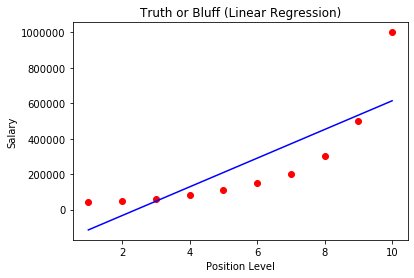

In [6]:
## Visualising the linear regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

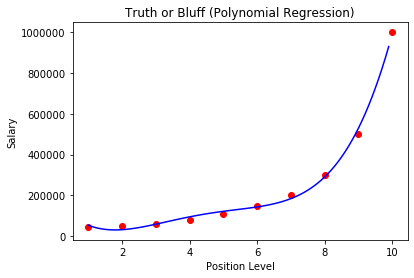

In [7]:
## Visualising the polynomial regression results

# For higher resolution and smoother curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [8]:
## Predicting a new result with Linear Regression

lin_reg.predict([[6.5]]) # Predicting for Position Level = 6.5

array([330378.78787879])

In [9]:
## Predicting a new result with Polynomial Regression

lin_reg2.predict(poly_reg.fit_transform([[6.5]])) # Predicting for Position Level = 6.5

array([158862.45265155])